In [54]:
import numpy as np

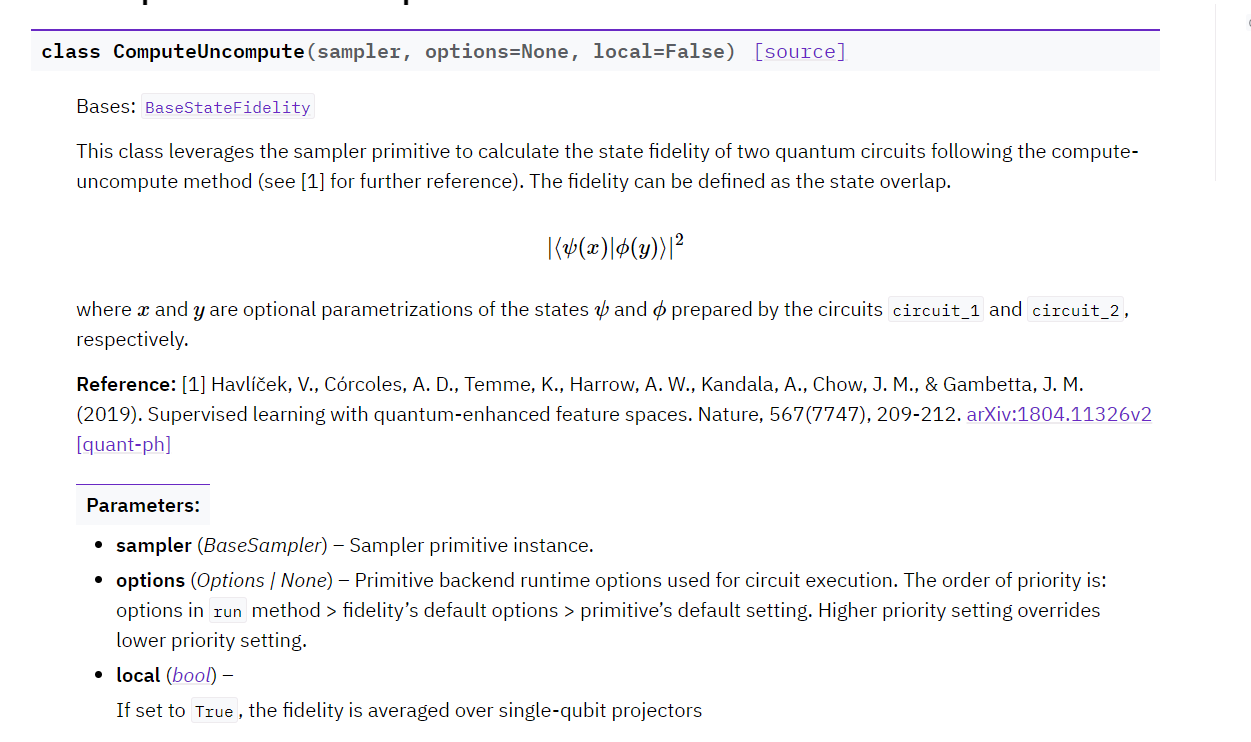

If I understand correctly, you are not able to compute fidelity between two quantum states, as BaseSampler() has been deprecated.



**And as you said SamplerV2() is not really working. In that case, you can use qiskit.sampler() which came as an alternative to BaseSampler for usage in Simulators, instead of SamplerV2 from qiskit_ibm_runtime.**



In [74]:
from qiskit import QuantumCircuit
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler 
from qiskit.circuit.library import QFT
from qiskit.circuit.library import TwoLocal,EfficientSU2


In [93]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [94]:
service=QiskitRuntimeService()

backend=service.least_busy(operational=True,simulator=False)
backend.name

'ibm_brisbane'

In [96]:
sampler_real=Sampler(mode=backend)

In [38]:
qc1 = QFT(num_qubits=3)

qc2 = QFT(num_qubits=3)


In [79]:
efficient=EfficientSU2(num_qubits=3,entanglement="linear")

x=efficient.num_parameters
print(f"Number of parameters is: {x}\n")

param_values=np.random.uniform(0,0.5,size=x)
print("Parameter Values are:\n"); print(*[i for i in param_values],sep="\n")

efficient_circ=efficient.assign_parameters(param_values)

Number of parameters is: 24

Parameter Values are:

0.4502440889187235
0.16957101537825298
0.4863137575567804
0.4592991636365857
0.15539497015567955
0.0037240541721698106
0.25895728277901714
0.1925222949482086
0.2764145247639656
0.3391366096232966
0.15676790756152353
0.08648687491347812
0.2761160842391122
0.34144556610309496
0.13177665521890397
0.36043490256322025
0.3948307921058222
0.4605546218154815
0.34859682999867414
0.2044931565362626
0.3200949447975241
0.11178025017315596
0.3780705687747263
0.4047767518196639


In [80]:
two_local = TwoLocal(3, 'rx', 'cz')
x=two_local.num_parameters
print(f"Number of parameters is: {x}\n")

param_values=np.random.uniform(0,0.5,size=x)
print("Parameter Values are:\n"); print(*[i for i in param_values],sep="\n")

bounded_circ=two_local.assign_parameters(param_values)

Number of parameters is: 12

Parameter Values are:

0.2566159139517601
0.36161626395994095
0.20374230554905853
0.0394623665175034
0.3190120984128129
0.33357879800953477
0.3161406524336529
0.3345450524352352
0.2259855890874587
0.43926062983892855
0.030548986246230203
0.3680988567090114


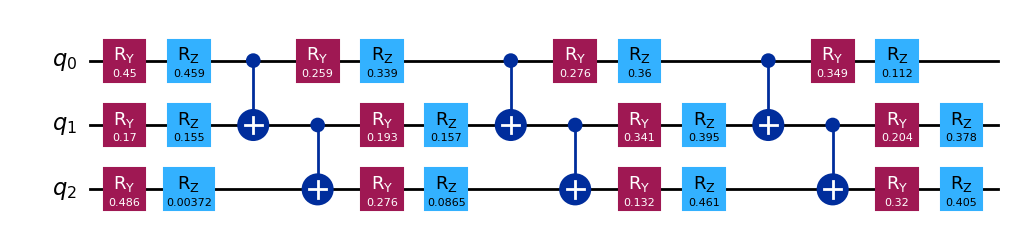

In [81]:
efficient_circ.decompose().draw(output="mpl")

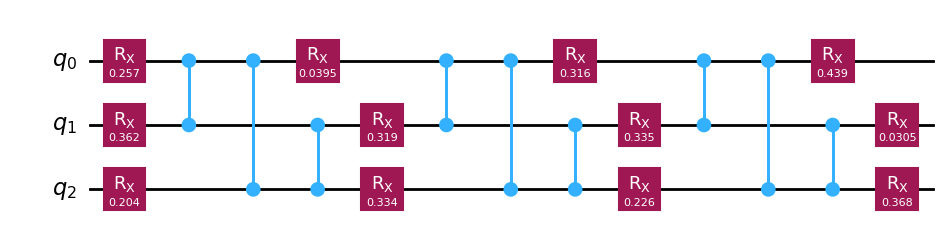

In [82]:
bounded_circ.decompose().draw(output="mpl")

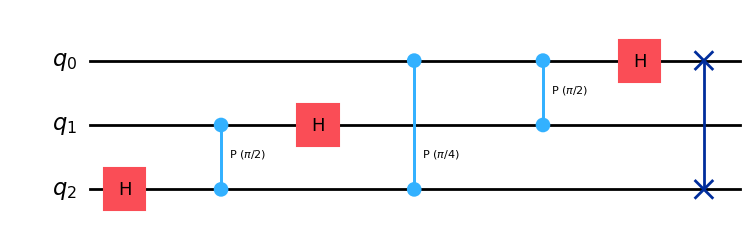

In [83]:
qc1.decompose().draw(output="mpl")

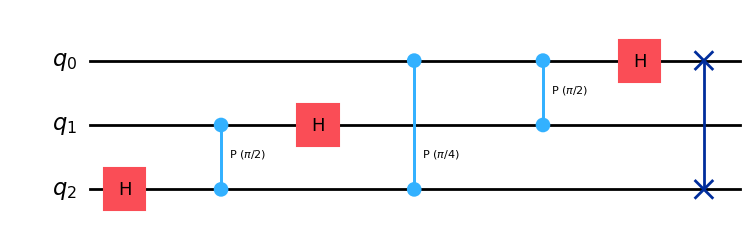

In [84]:
qc2.decompose().draw(output="mpl")

Using Real Sampler initialized to Ibm_brisband backend:

In [97]:
sampler=sampler_real

compute_uncompute = ComputeUncompute(sampler,local=True)

fidelity = compute_uncompute.run([efficient_circ], [bounded_circ])


result = fidelity.result()

print("State fidelity between qc1 and qc2:", result.fidelities[0])

ValueError: The sampler should be an instance of BaseSampler, but got <class 'qiskit_ibm_runtime.sampler.SamplerV2'>

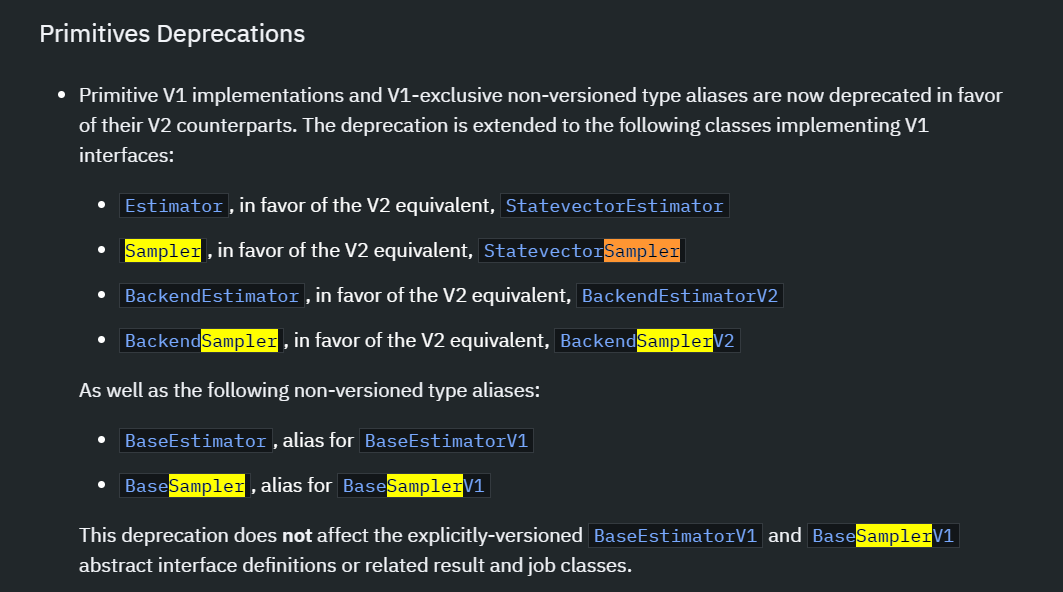

As you can see, Sampler() has to be an instance of BaseSampler().

* As such, Use the one provided in qiskit.primitives

* Here is the documentation: 
  https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.Sampler


* Note, this has been deprecated in the latest qiskit 1.2 release. I am still using qiskit 1.1

---

Here, is the recent implementation of Sampler:

from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()
 
pub = (circuit, params)

job = sampler.run([pub], shots=256)

result = job.result()[0]

---

In case you are using qiskit 1.2, just use StateVectorSampler from qiskit primitives. I have not done that here, as I do not want to change my version just yet.

In [88]:
sampler=Sampler()

compute_uncompute = ComputeUncompute(sampler,local=True)

fidelity = compute_uncompute.run([efficient_circ], [bounded_circ])


result = fidelity.result()

print("State fidelity between qc1 and qc2:", result.fidelities[0])

State fidelity between qc1 and qc2: 0.616292505417198


In [92]:
sampler=Sampler()


compute_uncompute = ComputeUncompute(sampler,local=False)

fidelity = compute_uncompute.run([efficient_circ], [bounded_circ])

result = fidelity.result()

print("State fidelity between qc1 and qc2:", result.fidelities[0])

State fidelity between qc1 and qc2: 0.1229360730096997


In [89]:

sampler=Sampler()

# Initialize the ComputeUncompute fidelity calculator
compute_uncompute = ComputeUncompute(sampler,local=True)

# Calculate the fidelity between the two circuits
fidelity = compute_uncompute.run([qc1], [qc2])

# Get the result
result = fidelity.result()

# Print the fidelity result
print("State fidelity between qc1 and qc2:", result.fidelities[0])

State fidelity between qc1 and qc2: 0.9999999999999993


In [90]:

sampler=Sampler()

# Initialize the ComputeUncompute fidelity calculator
compute_uncompute = ComputeUncompute(sampler,local=False)

# Calculate the fidelity between the two circuits
fidelity = compute_uncompute.run([qc1], [qc2])

# Get the result
result = fidelity.result()

# Print the fidelity result
print("State fidelity between qc1 and qc2:", result.fidelities[0])

State fidelity between qc1 and qc2: 0.9999999999999992
